Directory

In [2]:
%cd /content/drive/MyDrive/Data Mining/2. Cox Proportional Hazard Regression

/content/drive/MyDrive/Data Mining/2. Cox Proportional Hazard Regression


In [3]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=e1068c83bfad3eae027ca4909cf27b3dd566794e8805b8183f283264a6df6e5d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
import pandas as pd

Dataset

In [39]:
dataset = pd.read_csv("lung.csv")
dataset = dataset.dropna()
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [40]:
#data transformation
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [41]:
dataset = dataset.drop(columns=["inst"])
dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


Cox Proportional Hazard

In [42]:
#CPH model

from lifelines import CoxPHFitter
model = CoxPHFitter(penalizer=0.1)
model.fit(dataset, "time", event_col="status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -496.98
         time fit was run = 2024-08-05 16:46:02 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.46       0.63       0.18            -0.82            -0.09                 0.44                 0.91
ph.ecog     0.48       1.61       0.18             0.13             0.83                 1.14                 2.28
ph.karno    0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
pat.karno  -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

            cmp to     z    p   -log2(p)
covariate                               
age           0.00  0.83 0.40       1.31
sex           0.00 -2.47 0.01       6.21
ph.ecog       0.00  2.71 0.01       7.24
ph.karno      0.00  1.21 0.22       2.15
pat.karno     0.00 -1.53 0.13       2.99
meal.cal      0.00  0.03 0.98       0.03
wt.loss       0.00 -1.44 0.15       2.75
---
Concordance = 0.65
Partial AIC = 1007.96
log-likelihood ratio test = 22.27 on 7 df
-log2(p) of ll-ratio test = 8.78

Visualization

<Axes: xlabel='log(HR) (95% CI)'>

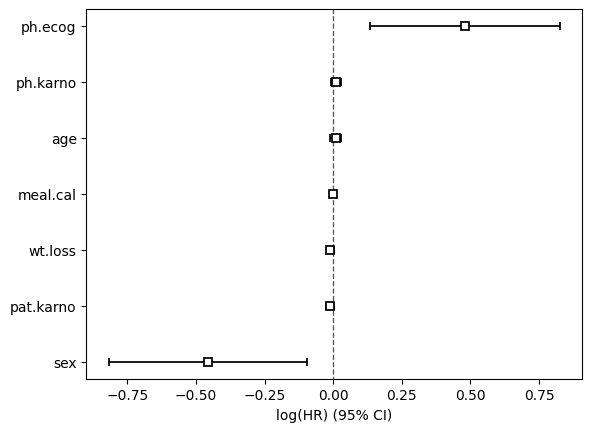

In [43]:
model.plot()